In [ ]:
# DATA LOAD 

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # 가장 자주 나타나는 단어 10,000개만

In [ ]:
print(len(train_data)) # train data = 25,000
print(list(train_data)[0:10]) # word index
list(train_labels)[0:10] # postiivew = 1 , negative = 0

25000
[[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32], [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369,

[1, 0, 0, 1, 0, 0, 1, 0, 1, 0]

In [ ]:
# train_data[0] # 1 -> 문서 시작을 알리는 index

In [ ]:
word_index = imdb.get_word_index()
word_index

1646592/1641221 [==============================] - 1s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
print([k for k, v in word_index.items() if v == 1])
print([k for k, v in word_index.items() if v == 2])
print([k for k, v in word_index.items() if v == 3])
print([k for k, v in word_index.items() if v == 4])

['the']
['and']
['a']
['of']


In [ ]:
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])

In [ ]:
decoded_review =' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
# Preprocessing
import numpy as np

def vectorize_sequences(sequences, dimension=10000) :
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences) :
        results[i, sequence] = 1.
    return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
# Define Model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 

In [ ]:
# Model compile
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metics=['accuracy'])

In [ ]:
# Validation Set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [ ]:
# Fitting the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 191us/step - loss: 0.5313 - acc: 0.7847 - val_loss: 0.4070 - val_acc: 0.8699
Epoch 2/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.3265 - acc: 0.8988 - val_loss: 0.3212 - val_acc: 0.8812
Epoch 3/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.2391 - acc: 0.9249 - val_loss: 0.3000 - val_acc: 0.8791
Epoch 4/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.1879 - acc: 0.9385 - val_loss: 0.2814 - val_acc: 0.8880
Epoch 5/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.1514 - acc: 0.9515 - val_loss: 0.2783 - val_acc: 0.8898
Epoch 6/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.1288 - acc: 0.9585 - val_loss: 0.2884 - val_acc: 0.8891
Epoch 7/20
15000/15000 [==============================] - 1s 79us/step - loss: 0.1048 - acc: 0.9689 - val_loss: 0.3084 - val_ac

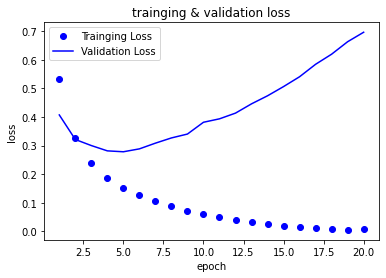

In [ ]:
# Visualizing training & loss
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Trainging Loss') # bo: 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation Loss') #b: 파린 실선
plt.title("trainging & validation loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

<function matplotlib.pyplot.show>

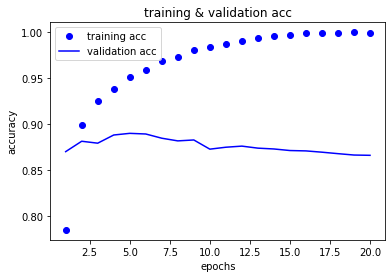

In [ ]:
plt.clf() # 그래프 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training & validation acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show

In [ ]:
# Refitting the Model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

Train on 25000 samples, validate on 10000 samples
Epoch 1/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.4438 - acc: 0.8186 - val_loss: 0.2740 - val_acc: 0.9162
Epoch 2/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.2575 - acc: 0.9090 - val_loss: 0.1964 - val_acc: 0.9376
Epoch 3/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.1975 - acc: 0.9290 - val_loss: 0.1858 - val_acc: 0.9303
Epoch 4/4
25000/25000 [==============================] - 2s 96us/step


In [ ]:
results

[0.2932559679555893, 0.884440004825592]

In [ ]:
model.predict(x_test)

array([[0.20144708],
       [0.99981743],
       [0.86724716],
       ...,
       [0.14240548],
       [0.07200571],
       [0.5741022 ]], dtype=float32)